14.036980447614376 km / s
766.589362713927 s days


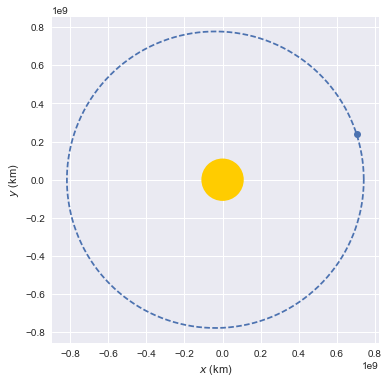

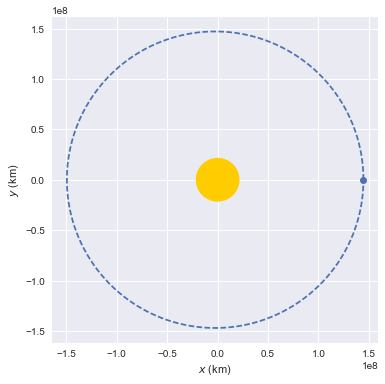

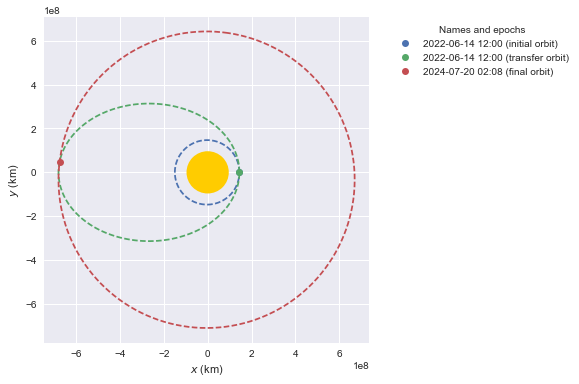

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion

from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Earth, Sun, Jupiter
from poliastro.twobody import Orbit
from poliastro.plotting import plot, OrbitPlotter
from poliastro.maneuver import Maneuver

plt.style.use("seaborn")


#data for jupiter
ja = 5.204267 * u.AU      #semi-major axis
jecc = 0.048775 * u.one   #eccentricity
jinc = 1.305 * u.deg      #inclination
jraan = 100.492 * u.deg   #right ascension of the ascending node
jargp = 275.066 * u.deg   #argument of the pericenter
jnu = 18.818 * u.deg      #true anomaly
# sun is the main attractor, first element

ss_j = Orbit.from_classical(Sun, ja, jecc, jinc, jraan, jargp, jnu, Time("2022-06-14 12:00", scale='utc'))
plot(ss_j)

#data for earth
ea = 0.9832898912 * u.AU
eecc = 0.016710219 * u.one
einc = 0.00005 * u.deg
eraan = 348.73936 * u.deg
eargp = 114.20783 * u.deg
enu = 0 * u.deg

ss_e = Orbit.from_classical(Sun, ea, eecc, einc, eraan, eargp, enu, Time("2022-06-14 12:00", scale='utc'))
plot(ss_e)

# ss_i = Orbit.circular(Earth, alt=700 * u.km)
# ss_i = ss_e
# dv = [50, 0, 0] * u.m/u.s
# man = Maneuver.impulse(dv)
# man = Maneuver((0*u.s, dv))

hoh = Maneuver.hohmann(ss_e, ja-ea)
print(hoh.get_total_cost())
print(hoh.get_total_time()/(24*3600), 'days')
# ss_f = ss_i.apply_maneuver(hoh)
# ss_f

op = OrbitPlotter()
ss_a, ss_j = ss_e.apply_maneuver(hoh, intermediate=True)
op.plot(ss_e, label='initial orbit')
op.plot(ss_a, label='transfer orbit')
op.plot(ss_j, label='final orbit')
plt.show()


